In [1]:
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import pandas as pd
from matplotlib import rc
rc('font', family = 'Gothic')
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [2]:
#df = fdr.DataReader('코드명', 'yyyy-mm-dd', 'yyyy-mm-dd')
df = fdr.DataReader('KS11', '2019-01-01', '2019-12-31')
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [3]:
df_s = df = fdr.DataReader('005930', '2019-01-01', '2019-12-31') #삼성전자

In [4]:
df_s.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Change'], dtype='object')

In [5]:
df_s.columns = map(lambda x:x+' of 005930', df_s.columns)
df_s.columns

Index(['Open of 005930', 'High of 005930', 'Low of 005930', 'Close of 005930',
       'Volume of 005930', 'Change of 005930'],
      dtype='object')

<AxesSubplot:xlabel='Date'>

findfont: Font family ['Gothic'] not found. Falling back to DejaVu Sans.


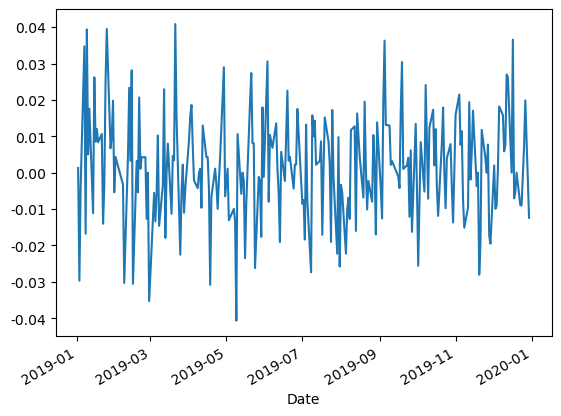

In [6]:
df_s['Change of 005930'].plot()

In [7]:
# target 코스피지수, LG에너지솔루션, 삼성SDI
#LG에너지솔루션
#삼성SDI

In [8]:
list_ = ['373220', '006400']
start_yyyymmdd = '2022-01-01'
end_yyyymmdd = '2022-12-31'

In [9]:
def plot(list_, start_yyyymmdd, end_yyyymmdd ):
    bins = []
    for i in list_:
        df = fdr.DataReader(i, start_yyyymmdd, end_yyyymmdd)
        df.columns = list(map(lambda x:x+f' of {i}', df.columns))
        df = df[f'Change of {i}']
        bins.append(df)
    listall = pd.concat(bins, axis = 1)
    ax = listall.plot()
    ax.set_xlabel('Date', fontsize = 12)
    ax.set_ylabel('Daily Return', fontsize = 12)
    ax.legend(list_)
    return listall

,Change of 373220,Change of 006400
Change of 373220,1.000000,0.404214
Change of 006400,0.404214,1.000000


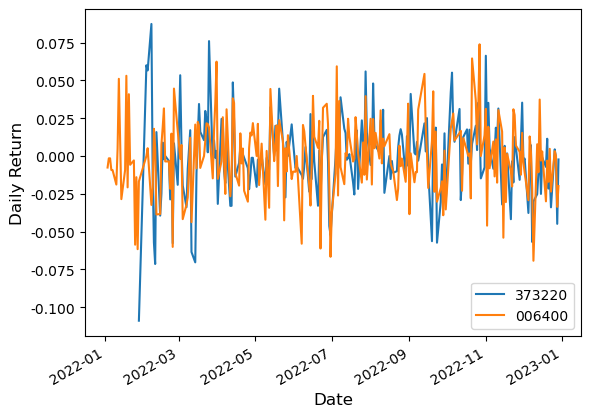

In [12]:
list_ = ['373220', '006400']
start_yyyymmdd = '2022-01-01'
end_yyyymmdd = '2022-12-31'
list_plot = plot(list_, start_yyyymmdd, end_yyyymmdd)
list_plot.corr()